In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
from PIL import Image
from sklearn.datasets import load_iris

In [102]:
train_data=[]
train_target=[]
test_data=[]
test_target=[]
train_path='/Users/zclin/Study/Coding/Python/MLforEIE-note&PPT&samples/作业3-手写字的数据集/train'
test_path='/Users/zclin/Study/Coding/Python/MLforEIE-note&PPT&samples/作业3-手写字的数据集/test'
for i in range(3):
    s=str(i)
    #print(s)
    #tp=train_path+s
    #print(tp)
    #t=test_path+s
    for root, dirs, files in os.walk(train_path+s):
      for file in files:
          path=os.path.join(root, file)
          img=Image.open(path)
          p=np.asarray(img)
          train_data.append(p)
          train_target.append(i)
    for root, dirs, files in os.walk(test_path+s):
      for file in files:
          path=os.path.join(root, file)
          img=Image.open(path)
          p=np.asarray(img)
          test_data.append(p)
          test_target.append(i) 
train_array=np.array(train_data)
test_array=np.array(test_data)
train_arr=np.zeros((15000, 784))
test_arr=np.zeros((1500, 784))
#print(train_data)
#train_array=train_data[0]
#print(len(train_data))
#test_array=test_data[0]
#train_array=np.zeros(15000)
#test_array=np.zeros(1500)
#for i in range(15000):
#    train_array[i]=train_data[i]
#    if(i<1500):
#       test_array[i]=test_data[i]
#for i in range(1, 15000):
#    np.append(train_array, train_data[i])
#    if(i<1500):
#       np.append(test_array, test_data[i])

#print(train_array[0])
#print(np.ravel(train_array[1]), np.ravel(train_array[1]).size)
#print(train_array.shape)
for i in range(15000):
  train_arr[i]=np.ravel(train_array[i])
for i in range(1500):
   test_arr[i]=np.ravel(test_array[i])
#scaler=StandardScaler()
#train_arr=scaler(train_arr)
print(train_arr.ndim)
print(train_arr.size)
print(train_arr.shape)

2
11760000
(15000, 784)


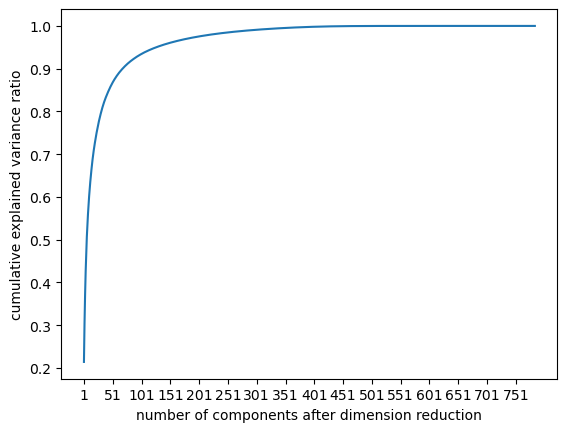

In [ ]:
pca_line=PCA().fit(train_arr)
a=np.arange(1, 785)
#print(a)
plt.plot(a, np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks(a[::50])
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [ ]:
pca_mle=PCA(n_components='mle')
data_mle=pca_mle.fit_transform(train_arr)
print(data_mle)

[[ 4.76907000e+02  4.19729201e+02 -1.26271064e+03 ... -4.43739504e-03
  -4.66998638e-03  1.25490183e-03]
 [ 1.51663700e+03 -6.85184225e+02  1.32034541e+02 ... -8.73749156e-07
   3.42842039e-03 -2.03362221e-03]
 [ 6.74956071e+02 -4.03909941e+02  2.04797927e+01 ... -4.29837338e-03
  -1.51842908e-03 -4.66721338e-04]
 ...
 [ 5.88822751e+02  1.05327654e+03 -1.43813353e+02 ... -7.17656482e-03
   9.85219714e-04 -5.30510881e-03]
 [ 3.10453654e+01  1.04257608e+03  1.21222368e+02 ... -1.95243452e-04
   3.49582074e-04  1.53678057e-03]
 [-7.24324947e+02  4.31307524e+01  5.42405523e+02 ...  6.53335928e-04
   5.27208279e-03  2.03212247e-03]]


In [104]:
#可以发现，选择200维可以获得足够好的效果
pca=PCA(n_components=200).fit(train_arr)
print('特征值：', pca.explained_variance_)
print('特征向量', pca.components_)

特征值： [749827.29513574 317193.15363839 237256.40844946 189301.8113578
 144842.54463141 135622.12931072 102356.26426793  84888.98437902
  76754.73555481  69742.3452862   64123.20823155  53362.91836241
  52343.53928493  46342.17140715  45575.31369839  40788.01757473
  37621.52239256  34906.91775575  32689.44229722  29828.14367471
  28750.30710873  27806.51181373  26500.93574975  24047.35187821
  24020.3519257   22946.95394398  22707.05330139  20448.54624444
  19453.52181382  18914.48451285  18339.50486524  17588.23046271
  16579.42639181  15843.5354936   15205.55131684  13998.01787099
  13497.23903839  12904.93239898  12472.68152106  12051.32695016
  11864.31068866  10950.11514291  10855.15335087  10707.57718988
  10471.84136894  10145.17281306   9772.71785489   9584.68171312
   9286.60914626   8817.68849676   8599.28896835   8429.22930927
   8060.41263167   7746.13334598   7499.85026927   7308.09139918
   7171.60734004   6702.85490706   6659.68616865   6502.33805679
   6277.51073022   62